In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")

In [8]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [10]:
df.shape

(645, 8)

In [12]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [14]:
df.dtypes

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [17]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
df[df.duplicated()]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
21,2768.124,6,19,3,2,2,100000
26,3664.740,19,19,3,2,3,200000
32,2134.800,10,19,3,2,2,55000
48,3735.900,19,19,3,2,3,200000
99,2063.640,5,7,4,2,2,70000
...,...,...,...,...,...,...,...
610,2134.800,3,6,4,2,3,98000
614,711.600,8,14,1,1,1,36000
630,1167.024,2,12,3,2,2,38000
638,1707.840,9,15,3,2,2,80000


In [19]:
df.duplicated().sum()

66

In [21]:
df.drop_duplicates(inplace=True)

In [23]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [24]:
df['Bedroom'].unique()

array([2, 4, 3, 1, 5, 6, 7])

In [25]:
df['Bedroom'].unique().sum()

28

In [26]:
len(df['Price'].unique())

153

In [27]:
df.sort_values(by=['Floor'], inplace=True)

In [28]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
455,1391.178,1,7,1,3,3,50000
51,1494.360,1,5,2,2,2,70000
59,1362.714,1,7,3,2,2,43000
258,3558.000,1,5,2,2,2,63000
209,1601.100,1,4,3,2,2,65000


In [29]:
df.shape

(579, 7)

In [30]:
df.size

4053

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [32]:
mm = MinMaxScaler()

In [33]:
data_trans = mm.fit_transform(df)

In [34]:
kmeans = KMeans(n_clusters=3)

In [35]:
kmeans.fit(data_trans)

KMeans(n_clusters=3)

In [36]:
kmeans.cluster_centers_

array([[0.08135691, 0.25340136, 0.2493565 , 0.11011905, 0.33630952,
        0.21071429, 0.12955383],
       [0.4012582 , 0.41344014, 0.40439505, 0.42990654, 0.51401869,
        0.4953271 , 0.43644024],
       [0.21487183, 0.15961779, 0.22323969, 0.36732456, 0.49177632,
        0.39802632, 0.2064965 ]])

In [37]:
df[kmeans.labels_ == 2]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
455,1391.178,1,7,1,3,3,50000
51,1494.360,1,5,2,2,2,70000
59,1362.714,1,7,3,2,2,43000
258,3558.000,1,5,2,2,2,63000
209,1601.100,1,4,3,2,2,65000
...,...,...,...,...,...,...,...
4,967.776,11,14,3,2,2,45000
154,996.240,11,14,3,2,2,44999
57,1067.400,12,12,3,2,2,36000
260,914.406,12,12,3,2,2,36000


In [38]:
df[kmeans.labels_ == 1]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
54,4643.190,1,6,5,4,4,180000
333,3558.000,1,7,3,2,2,160000
102,2938.908,2,25,4,2,2,95000
222,2963.814,2,25,4,2,2,95000
163,4091.700,2,15,3,2,4,180000
...,...,...,...,...,...,...,...
140,3323.172,19,21,5,3,4,140000
40,3063.438,21,24,5,2,4,145000
243,1899.972,21,27,4,2,2,57000
599,1458.780,21,27,3,2,2,60000


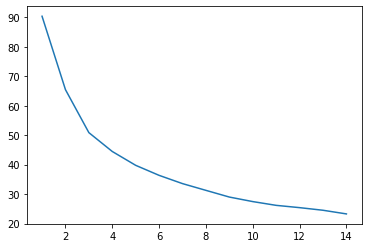

In [39]:
cs = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init="k-means++", max_iter=300)
    kmeans.fit(data_trans)
    cs.append(kmeans.inertia_)
plt.plot(range(1,15),cs)
plt.show()